## <span style="color:#0b486b">Instruction</span>

This task contains **three** parts, in increasing order of machine learning sophistication levels as we go through the process of building an effective machine learning solution.

* Part 1: Examine and understand your dataset ****
* Part 2: Build Model Intuition: What Works and What Doesn't ****
* Part 3: Model Screening and Comparison ****


## <span style="color:#0b486b">Part 1: Examine and understand your dataset </span>


You are required to work with the NUS_WIDE data for the task of face recognition.

The first step in the process is to understand your data. You are given the following segments of codes
- to import necessary libraries, 
- to define a utility function to display face images from the dataset, and
- to load the dataset.

---



**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the cell.

In [1]:
from sklearn import datasets

from sklearn import datasets
import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# append your own importing packages here if needed

In [2]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

**Warning**: the following command will download the dataset (approx. 200 Mb) to your local computer. You may need to install the *Pillow* package first by running the following command in the conda prompt.

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=80, resize=0.4)

In [4]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

---

You should realise that executing the above segment of codes will result in:
- variable `faces` containing the fetched dataset
- variables `X` and `y` which contain the features and the labels respectively.

We first examine the NUS_WIDE dataset. You are asked to supply your own codes in the following cells to answer the following questions.

#### Print out the description of the dataset using the variable `faces`. 


In [5]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(f"Description of the dataset using the variable faces is:\t{faces.DESCR}")

Description of the dataset using the variable faces is:	LFW faces dataset


####  Print out the total number of data points in this dataset.

In [6]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Student can use different field such as data, images target_names to get the number of data points 

print(f"Total number of data points in the dataset are:\t{len(faces.data)}")

Total number of data points in the dataset are:	1140


####  Each class, or label, in this dataset correspond to a person. Print out the number of classes, and the corresponding person name for each class. Print out 20 photos of *Donald Rumsfeld* and 20 photos of *Colin Powell*. 

In [8]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out the number of classes, and corresponding name of each class
class_ids=np.unique(y)
print(f"Total classes are: {len(class_ids)}")

# [insert your code here]

for i in range(len(class_ids)):
    # [insert your code here]
    print(f"Class {i} belongs to the class name: {faces.target_names[i]}")

Total classes are: 5
Class 0 belongs to the class name: Colin Powell
Class 1 belongs to the class name: Donald Rumsfeld
Class 2 belongs to the class name: George W Bush
Class 3 belongs to the class name: Gerhard Schroeder
Class 4 belongs to the class name: Tony Blair


20 photos of Colin Powell are displayed below:


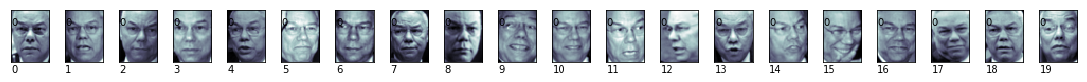

In [9]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out 20 photos of Donald Rumsfeld and 20 photos of Colin Powell
print("20 photos of Colin Powell are displayed below:")
display_faces(faces.images[faces.target==0],faces.target[faces.target==0],20)

20 photos of Donald Rumsfeld are displayed below:


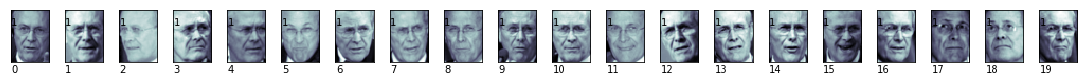

In [10]:
print("20 photos of Donald Rumsfeld are displayed below:")
display_faces(faces.images[faces.target==1],faces.target[faces.target==1],20)

####  Given our problem of interest is face recognition, should we choose clustering, classification, or regression machine learning methods? Explain why and list at least three ML algorithms that are suitable for this problem.

##### Use this markdown cell to write your answer for this question.

[*Enter our answer here*]

### Answer

Since our given problem is face recognition and we have been provided with the classes (which are basically the class labels), the best method would be classification.

Clustering is used when we have unsupervised data meaning we don't have any class labels. So, we can't use this method here.

Regression is used when we have to look at the relationship between the variables and predict new values. Which is not required in this case.

Classifaction is used when we have supervised data, meaning we have class labels and each label define the different value. Here we have 5 different classses from 0-4, and each class define name of a person. Hence, this is the best approach.

Three ML algorithms that are suitable for this problem are:

1) Logistic Regression
2) Linear discriminant analysis.
3) Support Vector Machines

####  Create *a single train-split* with 30% of data for testing and the rest for training.

In [11]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import train_test_split

# split into a training and testing set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=32) # [insert your codes here] 

---

### <span style="color:#0b486b">Part 2: Build Model Intuition: What Works and What Doesn't </span>

After we have gained a good understanding of the dataset from the previous step, we should by now be clear of the following points:

- Do you have labels for this data? And hence, is it a supervised learning or unsupervised learning problem?
- Recall that machine learning prediction is about learning a function $y= f(x)$ where $y$ is your label. Python variables `X` and `y` have been constructed and stored for you.
- Variable `X` is a matrix, with each row is a vector $x_i$ assigned with label $y_i$. You should examine the data types (continuous, categorical, its dimensionality, etc.) of the features in `X` and the label in $y$. This will help you choose the right ML methods.

These are the most common questions. Depending on the answers, more refined questions and considerations may be required for an improved solution.

As a machine learning practitioner, it is rarely the case that you can come up with the best solution at the first attempt. It is an iterative process. With the experience building up over time, you will be more efficient at it. **The next step is to get your hand dirty, start to explore to see what work, what doesn't work**. This process usually starts with models that are simple or more familiar to you.

####  Using *Logistic Regression* as the classifier, you will examine what works and what doesn't work for your data:

<span style="color:red">**(a)**</span> **Write a Scikit-Learn pipeline of two steps: 
PCA for dimensionality reduction followed by logistic regression for classification.**

In [12]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression

pca = decomposition.PCA()
pipe_face_recognition = Pipeline(steps=[('pca', pca)])

# create a logistic regression
logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

pipe_face_recognition.steps.append(('logistic', logistic))

<span style="color:red">**(b)**</span> ** Set the pipeline obtained in previous steps to keep the top *30 principal components*,  fit the training data, and then show the performance (recall, precision, accuracy, F-score) using the test data. **

In [13]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# [insert your codes here]
pipe_face_recognition.set_params(pca__n_components=30)

# train model
pipe_face_recognition.fit(X_train, y_train)

# perform prediction on the newly, unseen, test data.
pred_results = pipe_face_recognition.decision_function(X_test)

# LogisticRegression model implemeted in scikit-learn package employs a one-versus all strategy 
# for multilabel classification problem returns an array of log-likelihood prediction for each label
# Here, we need to use the argmax function to return the most likely predictive label.
pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]
pred_labels = pipe_face_recognition.predict(X_test)

# print out the classification report
target_names=[str(faces.target_names[i]) for i in range(len(np.unique(y)))]

print("Confusion Matrix:")
print(metrics.confusion_matrix(pred_labels, y_test))
print()
print(f"Accuracy score for class 0 - Colin Powell is: {accuracy_score(y_test[y_test==0], pred_labels[y_test==0])}")
print(f"Accuracy score for class 1 - Donald Rumsfeld is: {accuracy_score(y_test[y_test==1], pred_labels[y_test==1])}")
print(f"Accuracy score for class 2 - George W Bush is: {accuracy_score(y_test[y_test==2], pred_labels[y_test==2])}")
print(f"Accuracy score for class 3 - Gerhard Schroeder is: {accuracy_score(y_test[y_test==3], pred_labels[y_test==3])}")
print(f"Accuracy score for class 4 - Tony Blair is: {accuracy_score(y_test[y_test==4], pred_labels[y_test==4])}")
print(f"Overall accuracy is: {accuracy_score(y_test, pred_labels)}")
print("\nClassification Report:")
print(metrics.classification_report( pred_labels, y_test,  target_names=target_names))

Confusion Matrix:
[[ 51   6   6   0   2]
 [  1  16   6   2   1]
 [  8   6 146   6   9]
 [  1   1   1  24   1]
 [  3   0   2   5  38]]

Accuracy score for class 0 - Colin Powell is: 0.796875
Accuracy score for class 1 - Donald Rumsfeld is: 0.5517241379310345
Accuracy score for class 2 - George W Bush is: 0.906832298136646
Accuracy score for class 3 - Gerhard Schroeder is: 0.6486486486486487
Accuracy score for class 4 - Tony Blair is: 0.7450980392156863
Overall accuracy is: 0.804093567251462

Classification Report:
                   precision    recall  f1-score   support

     Colin Powell       0.80      0.78      0.79        65
  Donald Rumsfeld       0.55      0.62      0.58        26
    George W Bush       0.91      0.83      0.87       175
Gerhard Schroeder       0.65      0.86      0.74        28
       Tony Blair       0.75      0.79      0.77        48

      avg / total       0.82      0.80      0.81       342



<span style="color:red">**(c)**</span>** Write your code to show the performance (recall, precision, accuracy, F-score) *using Repeated Random Train-Split* (10 runs, each with 60/40 split for traning and testing) on the training data. You *must* report both the mean and standard deviation of the performance for each evaluation metrics**.

In [14]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# [insert your codes here]
# create pipeline
estimators = []
estimators.append(('pca', decomposition.PCA(n_components=30)))
estimators.append(('logistic', LogisticRegression(penalty='l1')))
model = Pipeline(estimators)
results_accuracy = []
results_precision=[]
results_recall=[]
results_f1=[]

for i in range(10):
        rs = ShuffleSplit(n_splits=10, train_size=0.6,test_size=.4, random_state=None)
        results_accuracy.append(cross_val_score(model, X, y, cv=rs,scoring='accuracy',verbose=1, n_jobs=-1))
        results_precision.append(cross_val_score(model, X, y, cv=rs,scoring='precision_macro',verbose=1, n_jobs=-1))
        results_recall.append(cross_val_score(model, X, y, cv=rs,scoring='recall_macro',verbose=1, n_jobs=-1))
        results_f1.append(cross_val_score(model, X, y, cv=rs,scoring='f1_macro',verbose=1, n_jobs=-1))

print("Mean for the each evaluation metric is:")
print("Run\tAccuracy\tPrecision\tRecall\t\tF1\t")

for i in range(10):
    print(f"{i}\t{round(results_accuracy[i].mean(),4)}\t\t{round(results_precision[i].mean(),4)}\t\t{round(results_recall[i].mean(),4)}\t\t{round(results_f1[i].mean(),4)}")
    
print("Standard Deviation for the each evaluation metric is:")
print("Run\tAccuracy\tPrecision\tRecall\t\tF1\t")

for i in range(10):
    print(f"{i}\t{round(results_accuracy[i].std(),4)}\t\t{round(results_precision[i].std(),4)}\t\t{round(results_recall[i].std(),4)}\t\t{round(results_f1[i].std(),4)}") 

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.5s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished
[Paral

Mean for the each evaluation metric is:
Run	Accuracy	Precision	Recall		F1	
0	0.7901		0.7416		0.6928		0.7086
1	0.7846		0.7515		0.696		0.7314
2	0.7884		0.7574		0.6926		0.7201
3	0.7895		0.749		0.6909		0.724
4	0.7879		0.744		0.6904		0.7097
5	0.782		0.756		0.7055		0.7221
6	0.7761		0.7552		0.689		0.722
7	0.7857		0.7472		0.6961		0.7147
8	0.7888		0.7582		0.6967		0.7085
9	0.7825		0.7505		0.712		0.7119
Standard Deviation for the each evaluation metric is:
Run	Accuracy	Precision	Recall		F1	
0	0.0147		0.0288		0.0126		0.0226
1	0.0149		0.0209		0.015		0.026
2	0.0235		0.0211		0.0145		0.026
3	0.0164		0.0257		0.0211		0.0267
4	0.0171		0.0142		0.0242		0.0273
5	0.0131		0.0239		0.0187		0.0199
6	0.0165		0.0259		0.0161		0.0131
7	0.0161		0.021		0.0267		0.0179
8	0.0186		0.0115		0.0276		0.0234
9	0.0159		0.0288		0.0237		0.0188


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished


<span style="color:red">**(d)**</span>** Write your code to show the performance (recall, precision, accuracy, F-score) using *K-fold cross-validation with k=10 folds* on the training data. **.

In [15]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
# evaluate pipeline
from sklearn.model_selection import KFold

results_accuracy1 = []
results_precision1=[]
results_recall1=[]
results_f11=[]

kfold = KFold(n_splits=10,random_state=None, shuffle=False) # split into training and testing sets with n_splits times.

results_accuracy1.append(cross_val_score(model, X, y, cv=kfold,scoring='accuracy',verbose=1, n_jobs=-1))# run the model with n_splits datasets and evaluate output.
results_precision1.append(cross_val_score(model, X, y, cv=kfold,scoring='precision_macro',verbose=1, n_jobs=-1))# run the model with n_splits datasets and evaluate output.
results_recall1.append(cross_val_score(model, X, y, cv=kfold,scoring='recall_macro',verbose=1, n_jobs=-1))# run the model with n_splits datasets and evaluate output.
results_f11.append(cross_val_score(model, X, y, cv=kfold,scoring='f1_macro',verbose=1, n_jobs=-1))# run the model with n_splits datasets and evaluate output.
    
print("Accuracy\tPrecision\tRecall\t\tF1\t")
print(f"{round(results_accuracy1[0].mean(),4)}\t\t{round(results_precision1[0].mean(),4)}\t\t{round(results_recall1[0].mean(),4)}\t\t{round(results_f11[0].mean(),4)}")


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished


Accuracy	Precision	Recall		F1	
0.7965		0.7709		0.7199		0.7332


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


<span style="color:red">**(e)**</span>** Preparing a table to summarize the performances obtained from step (c) and and (d) against recall, precision, accuracy and F-score from step (b). What conclusions can you draw from the comparison?**

*Use this markdown cell to write your answer for this question.*

[*Enter our answer here*]

#### Below table summarizes the evaluation metrics obtained from Step b,c and d.

|   |Recall   | Precision  |  Accuracy |F-measure   |
|---|---|---|---|---|
|  Step B |0.8000   |0.8200   |0.8041   |0.8100   |
|  Step C |0.6962   |0.7511   |0.7856  |0.7173  |
|  Step D |0.7199   |0.7709   |0.7965   |0.7332   |


From the above table, we can see that the highest accuracy, precision, recall and f1-score is obtained fom the step b. This could be because the data is distributed using the normal split and it may happen that the model is bias towards a particular class, as we can see in the step b, the accuracy for some class are higher and for some it is very less. It may happen, when the data was split, the class may be imbalanced.

Step c using the shuffle split, which basically splits the train and the testing data randomly, so we can't really tust the model based on the randomness. Moreover, the evaluation metrics for the random shuffle split are very bad when compared to the others.

Step d uses the Kfold cross validation, which basically splits the data into 10 folds, out of which 9 is for training and 1 for testing. This approach basically takes care of the class imbalance, so there are very less chances of the class baisness. Accuracy is nearly 80% and since the precision is nearly 77% and recall is 72% it means that the model will be good at prediciting the classes correctly despite the fact classes are imbalanced.

Hence, we can say that best method to use will be the k-fold cross validation.

Once you have build some intuition about the problem and the effectiveness of some modelling choices, if the initial results aren't too bad, you should start to gain some confidences in your approach. You are recommended to look at your results in the previous question again to convince yourselves of your results. Some questions you should starting asking are: Is your average prediction accuracy over 50%? over 70%? What else can you try to make it better? Is Logistic Regression a good choice? Did the reduced dimension help to improve the performance?**

**The next step is then to 'package' your code into some routine so that your investigation into your machine learning problem can be accelerated.**


**The following function is provided for you as a example of how one might 'package' the important steps so far into a single function to help accelerating your**.

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

**Using  this function given above, you are asked to:**

<span style="color:red">**(a)**</span>** Write your code to call this function with following specification and print out the mean and standard deviation of the *accuracy* obtained.**
    - model: Logistic Regression (using l1 regulaization)
    - PCA dimnesion = 30
    - the number of runs=10
    

In [17]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

b= ml_algorithm_screening_face(X,y,LogisticRegression(penalty='l1'),'logistic','accuracy',30,10)
print(f"Accuracy mean is : {b.mean()}")
print(f"Accuracy standard deviation is : {b.std()}")

Accuracy mean is : 0.7973684210526316
Accuracy standard deviation is : 0.03452398009500777


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


<span style="color:red">**(b)**</span>** Face recognition has a high-dimensional data problem typical  in modern machine learning. This explains why one might routinely use PCA to reduce its dimesion.**

**Write your code to search for right dimension from a list of *dim = {10, 20,..,150}* using the same setting in question 2.1(a).**
- Print out the results for each dimension.
- Use box-plot to visualize the mean and standard deviation of the accuracy for each dimension on the same figure, and 
- Report the dimension for PCA that gives the best result in term of accuracy.

In [18]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline

acc=[]
# [insert your code here]
def finding_pcaDim(pca_dim,i):
        pca = decomposition.PCA()
        #print(pca)

        pipe_face_recognition = Pipeline(steps=[('pca', pca)])
        #print(pipe_face_recognition)

        # create a logistic regression
        logistic = LogisticRegression(penalty='l1', dual=False,\
                      tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
                      class_weight=None, random_state=None, solver='liblinear', \
                    max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

        pipe_face_recognition.steps.append(('logistic', logistic))
        pipe_face_recognition.set_params(pca__n_components=pca_dim)
        
        kfold= KFold(n_splits=10,random_state=None)
        acc.append(cross_val_score(pipe_face_recognition,X,y,cv=kfold,scoring='accuracy'))
        #print(f"Variance for each dimension is: {np.cumsum(np.round(pipe_face_recognition.named_steps.pca.explained_variance_ratio_,decimals=4)*100)}")
        print(f"Accuracy for {pca_dim} dimensions is: {acc[i]}")

In [19]:
import plotly.plotly as py
import plotly.graph_objs as go
i=0
for k in range(10,160,10):
    finding_pcaDim(k,i)
    i=i+1
    print()

Accuracy for 10 dimensions is: [0.56140351 0.56140351 0.56140351 0.50877193 0.55263158 0.59649123
 0.49122807 0.47368421 0.5        0.56140351]

Accuracy for 20 dimensions is: [0.72807018 0.70175439 0.66666667 0.6754386  0.64912281 0.69298246
 0.75438596 0.68421053 0.69298246 0.69298246]

Accuracy for 30 dimensions is: [0.86842105 0.77192982 0.77192982 0.8245614  0.83333333 0.77192982
 0.77192982 0.78947368 0.78947368 0.80701754]

Accuracy for 40 dimensions is: [0.86842105 0.85087719 0.83333333 0.85087719 0.85087719 0.8245614
 0.83333333 0.83333333 0.81578947 0.79824561]

Accuracy for 50 dimensions is: [0.86842105 0.84210526 0.88596491 0.8245614  0.87719298 0.83333333
 0.81578947 0.8245614  0.8245614  0.83333333]

Accuracy for 60 dimensions is: [0.88596491 0.85087719 0.8245614  0.79824561 0.88596491 0.85087719
 0.83333333 0.81578947 0.83333333 0.84210526]

Accuracy for 70 dimensions is: [0.86842105 0.8245614  0.85087719 0.81578947 0.89473684 0.85087719
 0.8245614  0.79824561 0.85964912

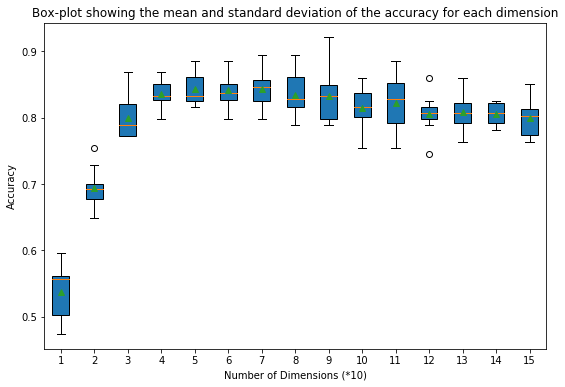

In [20]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
plt.title("Box-plot showing the mean and standard deviation of the accuracy for each dimension")
plt.xlabel("Number of Dimensions (*10)")
plt.ylabel("Accuracy")

bp=ax.boxplot(acc,showmeans=True,patch_artist=True)
plt.show()

### Best Performance

From the above box-plot, we can visualize that when the number of dimensions are set to 70, the model performs better over the other dimenisons. The highest accuracy is obtained for PCA components and from the plot, we can see that the highest median has been obtained when we have 70 dimensions. Moreover, this captures more than 90% of the variance, which is useful for the computations of the model.

---
### Part 3: Model Screening and Comparison

**By now, you should have a very good idea of data, some models and parameters that might perform well for your problem. However, by no means it should be best. **

**The last part of this assignment is about the skill to screen best model for your problem. Going beyond the question 'which model is applicable to my problem?', you should start to ask the question 'which set of models should I test for my problem?'.**

**It is important to screen through different types of ML algorithms and then select the most appropriate algorithm for your data. As it is commonly used in practice, in this assigment, you are suggested to explore 3 groups of models, each including 2 to 3 algorithms. **

1. Linear classification models
    - Logistic Regression
    - Linear Discriminant Analysis (LDA)
2. Non-linear classification models
    - Support Vector Machines
    - Neural Networks
3. Non-parametric and probabilistic classification models
    - Random Forest Classifier
    - K-NN Classifer
    - GaussianNB

Fixing the PCA dimension to the value you founded in Part 2, write your code to compare the performance among these two linear models. Which model performs better? and write down any observation you might have.** 

* [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Linear Discriminant Analysis (LDA)](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [49]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

#  Write your code to compare the performance among linear models. 
#     - Logistic Regression
#     - LinearDiscriminantAnalysis (LDA)

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# [insert your code here]
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']


print("\tLogistic Regression\tLinearDiscriminantAnalysis")
for k in range(4):
    lg= ml_algorithm_screening_face(X,y,LogisticRegression(penalty='l1'),'logistic',metrics[k],70,10)
    #print(f"{metrics[k]}: {lg.mean()}")

    lda= ml_algorithm_screening_face(X,y,LinearDiscriminantAnalysis(solver='svd'),'lineardiscriminant',metrics[k],70,10)
    print(f"{metrics[k]} is: {round(lg.mean(),2)}\t{round(lda.mean(),2)}")

	Logistic Regression	LinearDiscriminantAnalysis


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


accuracy is: 0.84	0.86


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.4s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


precision_macro is: 0.82	0.83


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


recall_macro is: 0.8	0.82


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.1s finished


f1_macro is: 0.81	0.82


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


Fixing the PCA dimension to the value you founded in Part 2, write your code to compare the performance among these two nonlinear models. Which model performs better? and write down any observation you might have.** 
* [Support Vector Machines](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* [Neural Networks](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [51]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Write your code to  compare the performance among non-linear models.
#     - Support Vector Machines (SVM)
#     - Neural Networks

# [insert your code here]

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

print("\tSupport Vector Machines\tNeural Networks")

for k in range(4):
    svm = ml_algorithm_screening_face(X,y,SVC(decision_function_shape='ovo'),'SVM',metrics[k],70,10)
    neurl = ml_algorithm_screening_face(X,y,MLPClassifier(verbose=0, random_state=0),'MLPClassifier',metrics[k],70,10)
    print(f"{metrics[k]} is: {round(svm.mean(),2)}\t{round(neurl.mean(),2)}")

	Support Vector Machines	Neural Networks


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.2s finished


accuracy is: 0.46	0.72


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.9s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished


precision_macro is: 0.09	0.64


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.5s finished


recall_macro is: 0.2	0.66


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


f1_macro is: 0.13	0.64


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.1s finished


Fixing the PCA dimension to the value you founded in Part 2, write your code to compare the performance among these non-parametric and probabilistic models. Which model performs better? and write down any observation you might have.** 
* [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [K-NN Classifer](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [53]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Write your code to compare the performance among non-parametric and probabilistic models.
#     - Random Forest Classifier
#     - K-NN Classifer
#     - GaussianNB

# [insert your code here]
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

print(f"\tRandom Forest Classifier\tK-NN Classifer\tGaussianNB")

for k in range(4):
    rfc= ml_algorithm_screening_face(X,y,RandomForestClassifier(random_state=0),'logistic',metrics[k],70,10)
    knn= ml_algorithm_screening_face(X,y,KNeighborsClassifier(n_neighbors=3),'lineardiscriminant',metrics[k],70,10)
    gnb= ml_algorithm_screening_face(X,y,GaussianNB(),'logistic',metrics[k],70,10)
    print(f"{metrics[k]} is: {round(rfc.mean(),2)}\t{round(knn.mean(),2)}\t{round(gnb.mean(),2)}")

	Random Forest Classifier	K-NN Classifer	GaussianNB


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.2s finished


accuracy is: 0.61	0.61	0.8


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.5s finished


precision_macro is: 0.57	0.58	0.81


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.4s finished


recall_macro is: 0.42	0.49	0.73


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.0s finished


f1_macro is: 0.47	0.48	0.75


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


Write a summary and report the performance of chosen models in terms of different metrics: precision, recall, accuracy, F-measure.**
* Report the metrics of all methods in the following table, *bold* the best performance for each evaluation metrics (e.g., recall, precision, accuracy, F-measure)
* Which model gives best performance in terms of accuarcy?
* What are the lessions you have learned and conclusions you can made about this face recognition problem overall?
    
|   |Recall   | Precision  |  Accuracy |F-measure   |
|---|---|---|---|---|
|  Logistic Regression |0.8   |0.82   |0.84   |0.81   |
|  LDA |<b>0.82    |<b>0.83   |<b>0.86   |<b>0.82   |
|  SVM |0.2   |0.09   |0.46   |0.13   |
|  Neural Networks |0.66   |0.64   |0.72   |0.64   |
|  Random Forest |0.42   |0.57   |0.61   |0.47   |
|  K-NN |0.49   |0.58   |0.61   |0.48   |
|  GaussianNB |0.73   |0.81   |0.8   |0.75   | |


*Use this markdown cell to write your answer for this question.*

[*Enter our answer here*]

#### Answer

Here, we have used 6 different models and computed the evaluation metrics. The models used were:

1) Logistics Regression

2) LDA

3) SVM

4) Neural Networks

5) Random Forest

6) K-NN

7) GuassianNB

From the above table, we can see the best accuracy, precision, recall and the f1-score has been produced by LDA. LDA givest the best accuracy with 86%.

First, let's talk about the linear classification methods that is logistic regression and the linear discriminant analysis. Both the methods are used for the analysis of the categorical data. It is observed from the above set of inputs that LDA makes more assumptions regardig the underlying data. LDA works well for the normally distributed data whereas LR does not care about the distribution. Thus, we can say that LDA is slighlty better for the face regonition problem than LR and it can be seen from the above sumary of results.

Secondly, let's talk about the non-linear classification methods that is the support vector machine and the neural networks. Basically, we use these techniques when we can't get better results with the linear classifications. In this case, we can see SVM performs the worst compared to all the models. We use SVM to select the vectors selected from the training data and has weight assigned to each set, whereas in NN we have hidden layers which are dependent on the features present and the bias parameters which is useful for the prediction. Hence, NN perform better in case of face recognition.

Lastly, let's talk about the Non-parametric and probabilistic classification models that is Random forest, K-nn and the Guassian NB. We use these models when we don't have any prior knowledge and we don't have any concerns while selecting the right features for the prediction. As it can be seen in case of K-nn it looks out for the similar training patterns using distance. These models are flexible, free of assumptions and can result in higher performance when it comes to predictions. In our case, we can see results from the above summary of tables that the results are really poor. The reason is that sometimes these models require more training data, it may be slower to train as it has huge parameters to cover up and there are high chances that it may lead to the overfitting of the data as well.

Hence, we can conclude that to find the best model for our problem we need to run different classification methods as they help us to understand our data better and find the best classification method. As in our case, we could find that LDA was best followed by the LR. 

---
<div style="text-align: center">**END OF TASK**</div>